In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import configparser
config = configparser.ConfigParser()
config.read_file(open('config.ini'))

client_attributes_file_path = config['data-files']['clients_attributes']
active_promos_file_path = config['data-files']['active_promos']
executed_promos_file_path = config['data-files']['executed_promos']
sales_file_path = config['data-files']['sales']


In [2]:
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)

.editorconfig
config.ini
reto-notebook.ipynb
reto.py
reto-notebook-vlad.ipynb
README.md
reto-notebook-vlad-checkpoint.ipynb
reto-notebook-checkpoint.ipynb
HEAD
index
config
packed-refs
description
main
HEAD
HEAD
main
HEAD
6e0f0210653d587545ba18f0408456b7f8bdc3
f32865449de6001bebc304fa82dfd99ae3bce9
130bb2688af0fcc05eeec7543455fee01fef3b
f2ccdf28e881d2acb78403463752e20e8b2ef6
59f1ab11f65e6715b85b4037e4ec828d849576
02c1193fe4ddfe18c0fd55f85ff33af427a927
efb340b13b476568f6db9b4fd6ab89e12733da
78631a6d33324afab0f26a1fe5ca52c69e09f0
bf2383321f3e68e8ef4428f9e1652135c022d3
735d2daf8f74a17ba1e90bd6dd83bbd59c5d61
d4df7456410dac07651d5353a64c49eb379af2
a603f430a7f10cb260ba3a3f2ab9fab7b7ad2f
feb02b8fdc4a6a4b348f4d384302c0666fed60
91c58590207275522fbb794484e40d50801f96
35af7834f4e909a68fed672304503d0b0ab615
b5518ee6479764866d63199984c21d6b72c2ee
exclude
pre-receive.sample
applypatch-msg.sample
commit-msg.sample
pre-commit.sample
pre-push.sample
pre-rebase.sample
prepare-commit-msg.sample
update.sa

In [3]:
sales = pd.read_csv(sales_file_path, encoding='latin-1')
# sales[sales['Dcto'] < 0]
sales

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0
...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0


In [4]:
# 0	297601	8410	29	9
# sales[(sales['Cliente'] == 8410) & (sales['Marca'] == 29) & (sales['Cupo'] == 9)]
x = sales[(sales['Cliente'] == 8410) & (sales['Marca'] == 29) & (sales['Cupo'] == 9)]
x['Cliente']

853830    8410
Name: Cliente, dtype: int64

In [5]:
executed_promos = pd.read_csv(executed_promos_file_path, encoding='latin-1')
sanitized_executed_promos = executed_promos.drop_duplicates(subset = ['Cliente', 'Marca', 'Cupo'])
sanitized_executed_promos

,CodigoDC,Cliente,Marca,Cupo
0,297601,8410,29,9
1,297601,9337,29,9
2,309843,7404,40,16
3,309874,4017,40,16
4,309910,6316,40,16
...,...,...,...,...
27763,646815,2144,29,9
27764,646976,28,29,9
27765,647188,10023,29,9
27766,648099,10193,29,9


In [27]:
active_promos= pd.read_csv(active_promos_file_path, encoding='latin-1')
active_promos

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
1,297601,29,9,2018-08-06,2018-08-30,3795
2,297601,29,9,2018-08-06,2018-08-30,11816
3,298856,40,16,2018-08-12,2018-08-19,8444
4,309916,40,16,2018-08-12,2018-08-19,8488
...,...,...,...,...,...,...
422432,688354,40,16,2019-09-25,2019-09-26,14435
422433,688355,29,9,2019-09-25,2019-09-26,320
422434,688355,29,9,2019-09-25,2019-09-26,3117
422435,688355,29,9,2019-09-25,2019-09-26,3503


In [7]:
clients_attributes = pd.read_csv(client_attributes_file_path, encoding='latin-1')
clients_attributes

,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2009-03-03,4,21,12,1,1,1
1,9,2009-03-03,4,21,9,2,3,1
2,15,2009-03-03,4,21,9,2,3,0
3,37,2009-03-03,4,21,16,2,3,1
4,43,2009-03-03,4,21,9,2,3,0
...,...,...,...,...,...,...,...,...
15064,15040,2019-03-07,1,16,9,2,1,0
15065,15043,2019-03-07,1,20,15,2,2,1
15066,15052,2019-03-09,3,7,10,2,2,0
15067,15065,2019-03-16,4,21,9,2,2,0


In [8]:
sales_exec_promos = sales.merge(sanitized_executed_promos, how = 'left', on = ['Cliente', 'Marca', 'Cupo'])
sales_exec_promos.loc[sales_exec_promos['CodigoDC'].isnull() == False, 'ES_PROMO'] = 1

sales_exec_promos

# sales_exec_promos.isnull().any()


,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,CodigoDC,ES_PROMO
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,NaN,NaN
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,NaN,NaN
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,NaN,NaN
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,NaN,NaN
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0,NaN,NaN
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0,NaN,NaN
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0,NaN,NaN
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0,NaN,NaN


In [9]:
df = sales_exec_promos.merge(clients_attributes, how = 'left', on = 'Cliente')

del df['CodigoDC']
del df['FechaAltaCliente']

df = df.fillna({
    'ES_PROMO': 0, 
    'SegmentoPrecio': df['SegmentoPrecio'].mode()[0],
    'Cupo': df['Cupo'].mode()[0]
})

df

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,ES_PROMO,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,0.0,4,21,12,1,1,1
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,0.0,4,21,12,1,1,1
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,0.0,4,21,12,1,1,1
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,0.0,4,21,12,1,1,1
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,0.0,4,21,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0,0.0,1,5,9,2,3,1
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0,0.0,4,14,9,2,1,0
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0,0.0,4,14,9,2,1,0
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0,0.0,4,14,9,2,1,0


In [10]:
# These three lines 
x_vars = df.columns.tolist()
target_index = x_vars.index('ES_PROMO')
del x_vars[target_index]

x_train = df[x_vars]

y_train = df['ES_PROMO']

In [11]:
# # df[['ES_PROMO', 'Cupo']]
# cols = df.columns.tolist()
# identifier_index = cols.index('Cliente')
# del cols[identifier_index]

# sns.pairplot(df[cols],
#              vars = cols,
#              hue = 'ES_PROMO',
#              height=2.5)
# plt.tight_layout()
# plt.show()

In [12]:
df = pd.DataFrame(df, columns = ['Cliente', 'Año', 'Mes', 'ClaseEnvase', 'SegmentoPrecio', 'Marca','Cupo', 'Nr', 'Hl',
                                 'Dcto','Region', 'Gerencia','SubCanal', 'TipoPoblacion', 'Estrato', 'EF', 'ES_PROMO'])
df

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,ES_PROMO
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,4,21,12,1,1,1,0.0
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,4,21,12,1,1,1,0.0
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,4,21,12,1,1,1,0.0
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,4,21,12,1,1,1,0.0
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,4,21,12,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0,1,5,9,2,3,1,0.0
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0,4,14,9,2,1,0,0.0
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0,4,14,9,2,1,0,0.0
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0,4,14,9,2,1,0,0.0


In [13]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [14]:
h2o.init (nthreads = -1, max_mem_size = "16g")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9" 2020-10-20; OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)
  Starting server from /anaconda/envs/py37_default/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq5n1xcxb
  JVM stdout: /tmp/tmpq5n1xcxb/h2o_tjander_started_from_python.out
  JVM stderr: /tmp/tmpq5n1xcxb/h2o_tjander_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_tjander_k0e3ms
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"accepting new members, healthy"


In [15]:
data=h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
data.columns

['Cliente',
 'Año',
 'Mes',
 'ClaseEnvase',
 'SegmentoPrecio',
 'Marca',
 'Cupo',
 'Nr',
 'Hl',
 'Dcto',
 'Region',
 'Gerencia',
 'SubCanal',
 'TipoPoblacion',
 'Estrato',
 'EF',
 'ES_PROMO']

In [17]:
training_columns = ['Cliente', 'Año', 'Mes', 'ClaseEnvase', 'SegmentoPrecio', 'Marca','Cupo', 'Nr', 'Hl',
                                 'Dcto','Region', 'Gerencia','SubCanal', 'TipoPoblacion', 'Estrato', 'EF']
response_column = 'ES_PROMO'

train, test = data.split_frame(ratios=[0.7], seed=0)

In [18]:
model = H2ORandomForestEstimator(ntrees=50,
                                 max_depth=20,
                                 seed=0,
                                 nfolds=10)

In [19]:
model.train(x=training_columns,
            y=response_column,
            training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [20]:
type(model)

h2o.estimators.random_forest.H2ORandomForestEstimator

In [21]:
performance= model.model_performance(train)
performance


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.004886535359016786
RMSE: 0.06990375783187043
MAE: 0.013139248689323977
RMSLE: 0.05057398050449432
Mean Residual Deviance: 0.004886535359016786


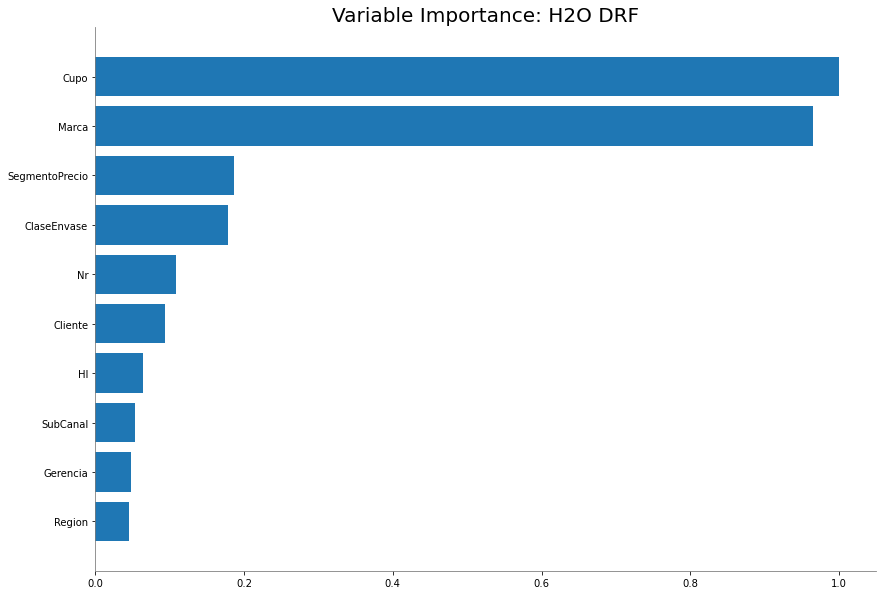

In [22]:
model.varimp_plot()

In [24]:
performance= model.model_performance(test)
performance


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.006818044088524648
RMSE: 0.08257144838577465
MAE: 0.01594632163114094
RMSLE: 0.05863242805886627
Mean Residual Deviance: 0.006818044088524648


In [28]:
promo_test= h2o.H2OFrame(active_promos)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [30]:
predict_data=['Cliente', 'Marca', 'Cupo', 'CodigoDC']

predict = model.predict(promo_test)

drf prediction progress: |████████████████████████████████████████████████| 100%


/anaconda/envs/py37_default/lib/python3.7/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'Año': substituting in a column of NaN
  warnings.warn(w)
/anaconda/envs/py37_default/lib/python3.7/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'Mes': substituting in a column of NaN
  warnings.warn(w)
/anaconda/envs/py37_default/lib/python3.7/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'ClaseEnvase': substituting in a column of NaN
  warnings.warn(w)
/anaconda/envs/py37_default/lib/python3.7/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'SegmentoPrecio': substituting in a column of NaN
  warnings.warn(w)
/anaconda/envs/py37_default/lib/python3.7/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'Nr': substituting in a column of NaN
  warnings.warn(w)
/anaconda/envs/py37_default/lib/python3.7/site-packages/h2o/jo

In [31]:
print(predict.describe())

Rows:422437
Cols:1




,predict
type,real
mins,0.0008547008782625198
mean,0.3108861978680165
maxs,0.4138951003551483
sigma,0.08443022446279623
zeros,0
missing,0
0,0.022730847448110582
1,0.025443822592496872
2,0.0032966840639710427


None
